In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

sns.set(color_codes = True)

# Data Visualization & Pre-processing

### Reading Dataset

In [27]:
studyOnlineDataset = pd.read_csv("predictOnlineCourseEngagementDataset.csv")

### Describing Dataset


In [28]:
studyOnlineDataset.head(5)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,Mobile,Pending
1,4326,Arts,27.802640,1,5,62.615970,65.632415,Mobile,Pending
2,5849,Arts,86.820485,14,2,78.458962,63.812007,Mobile,Completed
3,4992,Science,35.038427,17,10,59.198853,95.433162,Desktop,Completed
4,3866,Programming,92.490647,16,0,98.428285,18.102478,Desktop,Pending


In [29]:
studyOnlineDataset.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711


### Dropping Unnecessary Values

In [30]:
studyOnlineDataset.drop(columns=['UserID'], inplace=True)

### Null Check

In [31]:
studyOnlineDataset.isnull().sum()

CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

### Unique Value Check

In [32]:
studyOnlineDataset.nunique()

CourseCategory              5
TimeSpentOnCourse        8123
NumberOfVideosWatched      21
NumberOfQuizzesTaken       11
QuizScores               8123
CompletionRate           8123
DeviceType                  2
CourseCompletion            2
dtype: int64

### Check Data Type of Different Column

In [33]:
studyOnlineDataset.dtypes

CourseCategory            object
TimeSpentOnCourse        float64
NumberOfVideosWatched      int64
NumberOfQuizzesTaken       int64
QuizScores               float64
CompletionRate           float64
DeviceType                object
CourseCompletion          object
dtype: object

### Encoding CourseCategory

In [34]:
unique_courses = studyOnlineDataset['CourseCategory'].unique()
print(unique_courses)


['Health' 'Arts' 'Science' 'Programming' 'Business']


In [35]:
studyOnlineDataset.loc[studyOnlineDataset["CourseCategory"] == "Health", "CourseCategory"] = 0
studyOnlineDataset.loc[studyOnlineDataset["CourseCategory"] == "Arts", "CourseCategory"] = 1
studyOnlineDataset.loc[studyOnlineDataset["CourseCategory"] == "Science", "CourseCategory"] = 2
studyOnlineDataset.loc[studyOnlineDataset["CourseCategory"] == "Programming", "CourseCategory"] = 3
studyOnlineDataset.loc[studyOnlineDataset["CourseCategory"] == "Business", "CourseCategory"] = 4
studyOnlineDataset['CourseCategory'] = studyOnlineDataset['CourseCategory'].astype(int)

### Encoding Device Type

In [36]:
unique_device = studyOnlineDataset['DeviceType'].unique()
print(unique_device)


['Mobile' 'Desktop']


In [37]:
studyOnlineDataset.loc[studyOnlineDataset["DeviceType"] == "Desktop", "DeviceType"] = 0
studyOnlineDataset.loc[studyOnlineDataset["DeviceType"] == "Mobile", "DeviceType"] = 1
studyOnlineDataset['DeviceType'] = studyOnlineDataset['DeviceType'].astype(int)

### Encoding Course Result

In [38]:
result = studyOnlineDataset['CourseCompletion'].unique()
print(result)

['Pending' 'Completed']


In [39]:
studyOnlineDataset.loc[studyOnlineDataset["CourseCompletion"] == "Pending", "CourseCompletion"] = 0
studyOnlineDataset.loc[studyOnlineDataset["CourseCompletion"] == "Completed", "CourseCompletion"] = 1
studyOnlineDataset['CourseCompletion'] = studyOnlineDataset['CourseCompletion'].astype(int)

### Checking Dataset

In [40]:
studyOnlineDataset.head(10)

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,0,29.979719,17,3,50.365656,20.860773,1,0
1,1,27.802640,1,5,62.615970,65.632415,1,0
2,1,86.820485,14,2,78.458962,63.812007,1,1
3,2,35.038427,17,10,59.198853,95.433162,0,1
4,3,92.490647,16,0,98.428285,18.102478,0,0
5,0,79.466129,12,7,70.233329,76.484023,0,1
6,0,78.908724,10,2,86.836533,22.588896,1,0
7,4,12.068237,16,3,61.553646,27.410991,1,0
8,4,81.935709,8,4,90.264564,33.308437,0,1
9,3,83.394026,15,10,63.956353,33.261300,1,0


In [41]:
studyOnlineDataset.dtypes

CourseCategory             int32
TimeSpentOnCourse        float64
NumberOfVideosWatched      int64
NumberOfQuizzesTaken       int64
QuizScores               float64
CompletionRate           float64
DeviceType                 int32
CourseCompletion           int32
dtype: object

### Histogram Plot

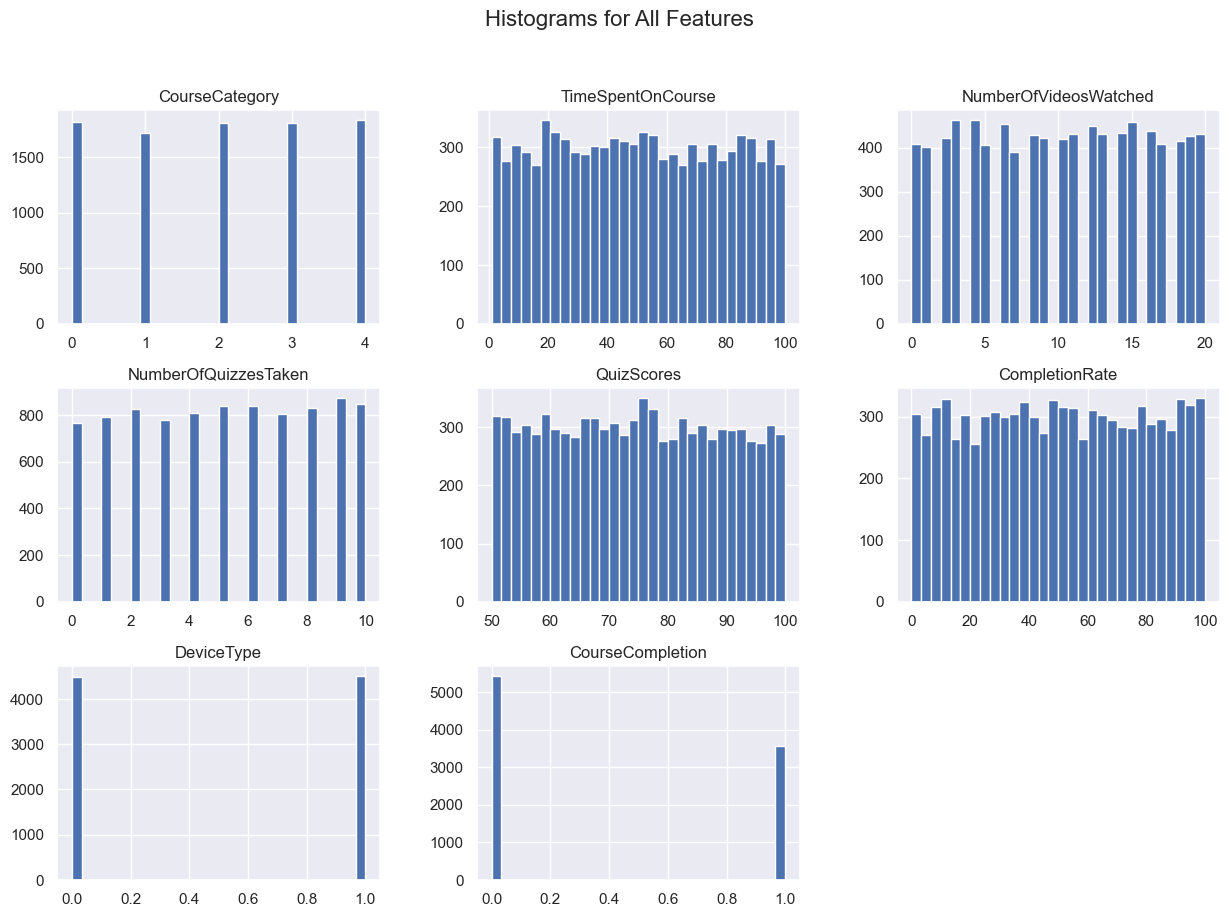

In [42]:
studyOnlineDataset.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for All Features', fontsize=16)
plt.show()


### Box plot

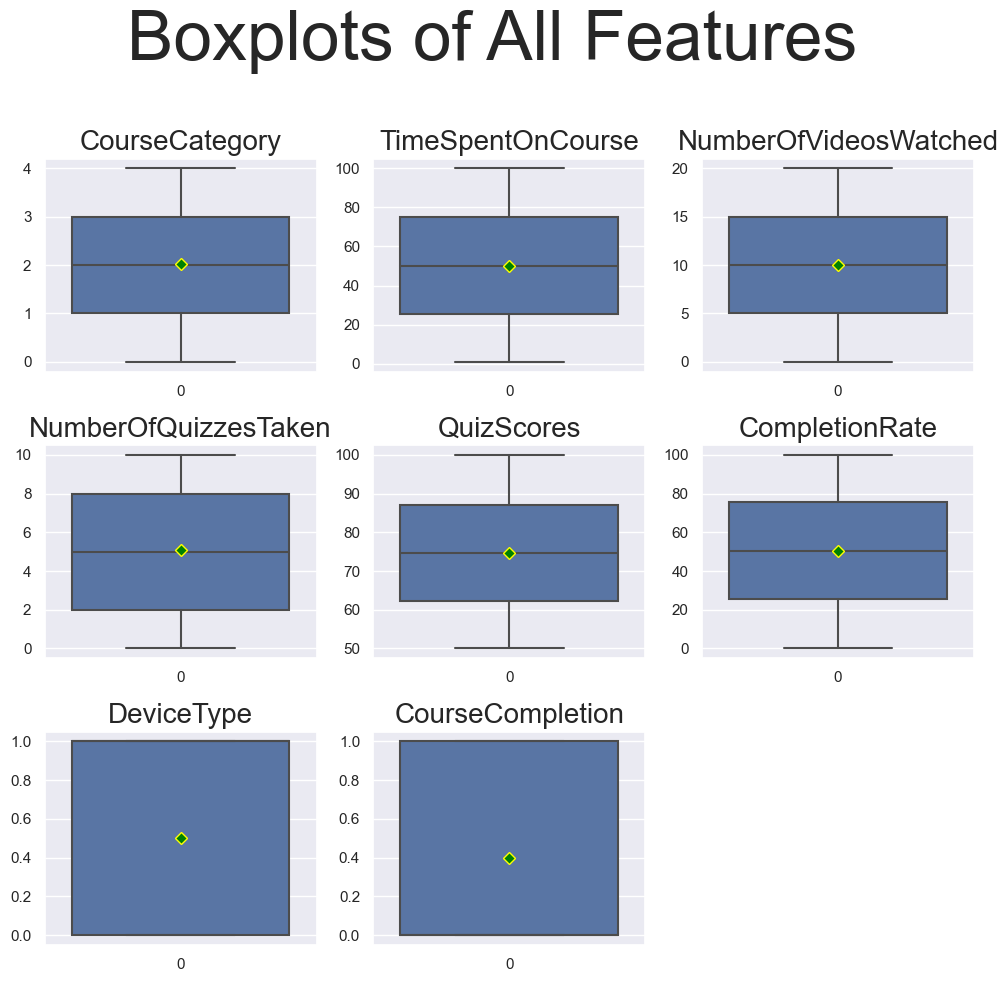

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle("Boxplots of All Features", size=50)

labels_list = list(studyOnlineDataset.columns)

idx = 0
red_circle = dict(markerfacecolor='red', marker='o')
green_diamond = dict(markerfacecolor='green', marker='D', markeredgecolor='yellow')

for i in range(3):
    for j in range(3):
        if idx < len(labels_list):
            sns.boxplot(ax=axes[i, j],
                        data=studyOnlineDataset[labels_list[idx]],
                        flierprops=red_circle,
                        showmeans=True,
                        meanprops=green_diamond)
            axes[i, j].set_title(labels_list[idx], fontsize=20)
            idx += 1
        else:
            axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#Model Building

### Dividing Dataset

In [44]:
x = studyOnlineDataset.drop('CourseCompletion', axis=1)
y = studyOnlineDataset['CourseCompletion']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Logistic Regression

In [45]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")
print()
print("Logistic Regression Report:")
print(classification_report(y_test, log_preds))


Logistic Regression Accuracy: 0.79

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1068
           1       0.77      0.70      0.73       732

    accuracy                           0.79      1800
   macro avg       0.79      0.78      0.78      1800
weighted avg       0.79      0.79      0.79      1800



### SVM Model

In [46]:
svm_model = SVC(kernel='rbf', C=1, random_state=42)  # RBF kernel for non-linear classification
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print()
print("SVM Report:")
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.83

SVM Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1068
           1       0.82      0.75      0.79       732

    accuracy                           0.83      1800
   macro avg       0.83      0.82      0.83      1800
weighted avg       0.83      0.83      0.83      1800



### Random Forest

In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print()
print("Random Forest Report:")
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.96

Random Forest Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1068
           1       0.97      0.92      0.95       732

    accuracy                           0.96      1800
   macro avg       0.96      0.95      0.95      1800
weighted avg       0.96      0.96      0.96      1800



In [48]:
for feature in (x.columns.tolist()):
    print(feature)

CourseCategory
TimeSpentOnCourse
NumberOfVideosWatched
NumberOfQuizzesTaken
QuizScores
CompletionRate
DeviceType


In [49]:
categories = ['Health', 'Arts', 'Science', 'Programming', 'Business']
devices = ['Desktop', 'Mobile']

userData = pd.DataFrame({
    'CourseCategory': [categories.index(input(f"Enter Course Name {categories}: "))],
    'TimeSpentOnCourse': [float(input("Enter Time Spent on Course: "))],
    'NumberOfVideosWatched': [int(input("Enter Number of Videos Watched: "))],
    'NumberOfQuizzesTaken': [int(input("Enter Number of Quizzes Taken: "))],
    'QuizScores': [float(input("Enter Average Quiz Score: "))],
    'CompletionRate': [float(input("Enter Completion Rate: "))],
    'DeviceType': [devices.index(input(f"Enter Device Type {devices}: "))]
})

prediction = rf_model.predict(userData)
print()
if prediction[0] == 0:
    print("Course PENDING")
if prediction[0] == 1:
    print("Course COMPLETED")


Enter Course Name ['Health', 'Arts', 'Science', 'Programming', 'Business']:  Science
Enter Time Spent on Course:  500
Enter Number of Videos Watched:  400
Enter Number of Quizzes Taken:  20
Enter Average Quiz Score:  100
Enter Completion Rate:  80
Enter Device Type ['Desktop', 'Mobile']:  Desktop



Course COMPLETED
